# Propagation of Two region waveguide

Basic case of waveguide with one-sided radiation modes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact
from fiberamp.fiber.microstruct.bragg import plotlogf, plotlogf_real, plotlogf_imag
from scipy.optimize import newton
from scipy.integrate import quad
import json
plt.style.use('dark_background')
%matplotlib widget

In [2]:
A = SlabExact(scale=1e-6, ts=[2e-6, 2e-6],
              ns=[1.4, 1.3], xrefs=[300,  300],
              symmetric=True, wl=1e-6)

# A = SlabExact(ns=[1.4, 1, 1.3], ts=[2e-6, 2e-6, 2e-6], xrefs=[100, 100, 100], wl=1e-6, symmetric=True)


In [3]:
def quadratic_piecewise(x):
    conds = [(x<-.5), ((-.5<=x)*(x<=.5)), (x>.5)]
    funcs = [0, lambda x: .25-x**2, 0]
    return np.piecewise(x, conds, funcs)
    
def modified_dist(x):
    return (x-1/4) * np.exp(-(x-1/2)**2)  

def odd_modified_dist(x):
    return x * np.exp(-x**2)
    
def normal_dist(x):
    return np.exp(-x**2)

In [4]:
# Set input function
f0 = quadratic_piecewise
f0_shifted = lambda x: f0(x) + 1
# Set input field type
field_type = 'TE'

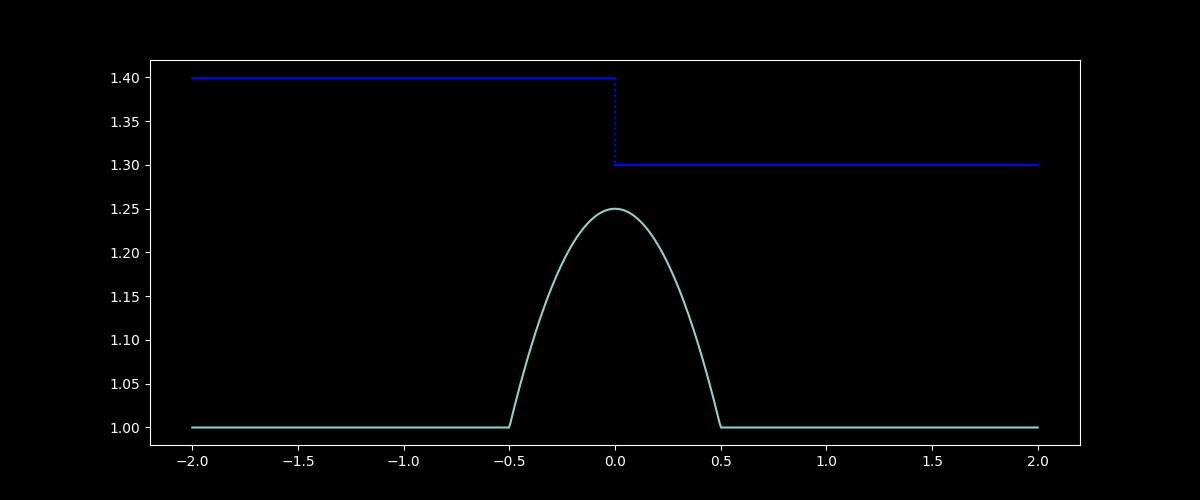

In [5]:
A.plot_refractive_index()
ax = plt.gca()
A.add_1d_plot(ax, f0_shifted)

# Check for guided modes

Doesn't seem like it should have any

In [6]:
mode_type = 'guided'


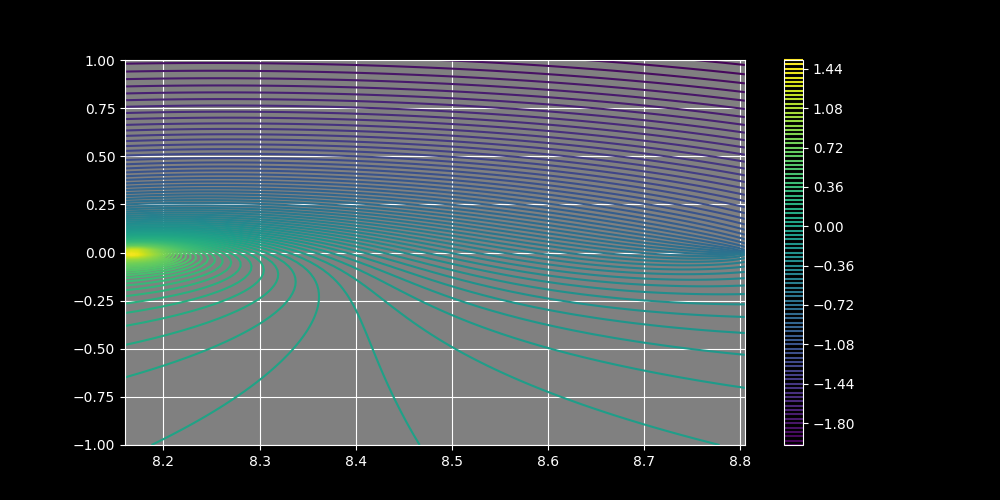

In [11]:
plotlogf(A.determinant, .999*A.K_low, 1.001*A.K_high, -1,1, field_type, mode_type,
         figsize=(10,5),iref=100, rref=100,levels=100)

No guided modes.

## Leaky Modes

In [12]:
mode_type = 'leaky'


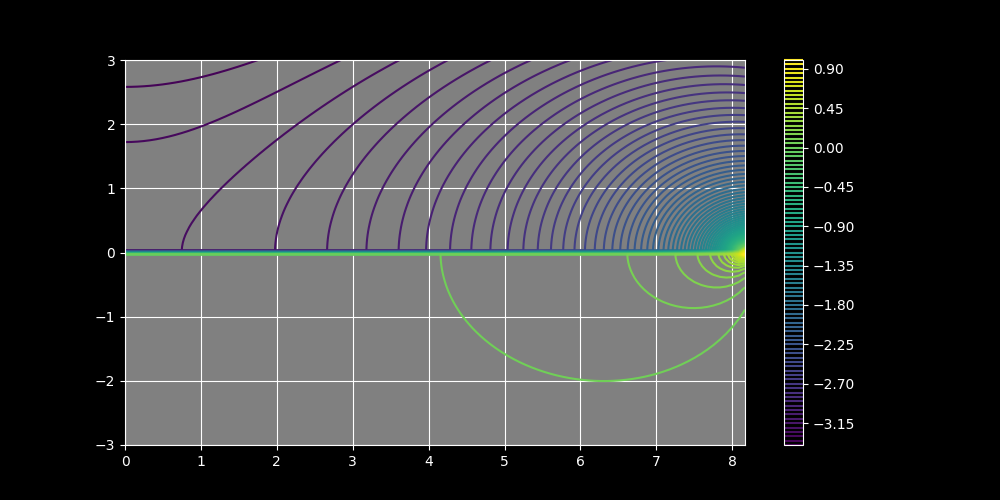

In [13]:
plotlogf(A.determinant, 0, A.K_low, -3,3, field_type, mode_type,
         figsize=(10,5),iref=100, rref=100,levels=100)

Definitely has leaky modes.

# Propagation of input



In [7]:
Propagator_Class = A.propagator()

In [8]:
A.Z_one_sided,  A.Z_evanescent

(3.26483885562159, 8.79645943005142)

In [9]:
A.Beta_from_Z(A.Z_one_sided), A.K0*A.n0

((8.168140899333464+0j), 8.79645943005142)

In [10]:
P0 = Propagator_Class(f0=f0, Lx=-.5, Rx=.5,
                      LZ=0.01, RZ=.999999999*A.Z_one_sided, NZ=200,
                      field_type=field_type,
                      paper_method=False,
                      sign='+1')


 99% (198 of 200) |##################### | Elapsed Time: 0:00:02 ETA:   0:00:00

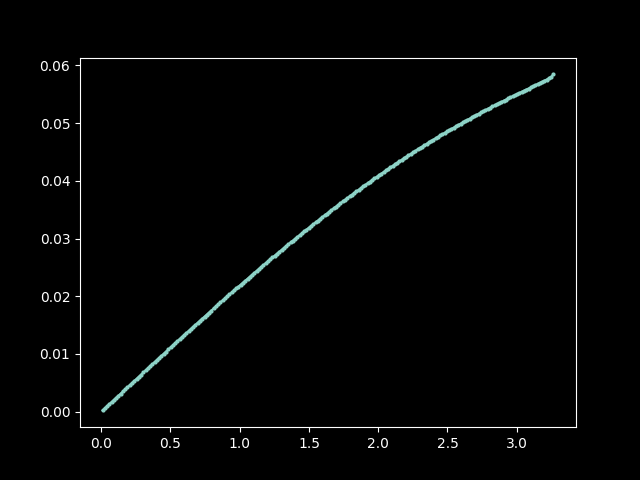

In [11]:
plt.close('all')
plt.plot(P0.Zs, P0.alphas.real, marker='o', markersize=2)


In [12]:
P1e = Propagator_Class(f0=f0, Lx=-.5, Rx=.5, 
                       LZ=1.0001*A.Z_one_sided, RZ=6.2, NZ=200, 
                       field_type=field_type,
                       paper_method=False,
                       sign='+1')


 99% (198 of 200) |##################### | Elapsed Time: 0:00:02 ETA:   0:00:00

In [13]:
P1o = Propagator_Class(f0=f0, Lx=-.5, Rx=.5, 
                     LZ=1.0001*A.Z_one_sided, RZ=6.2, NZ=200, 
                     field_type=field_type, 
                     paper_method=False,
                     sign='-1')


 99% (198 of 200) |##################### | Elapsed Time: 0:00:02 ETA:   0:00:00

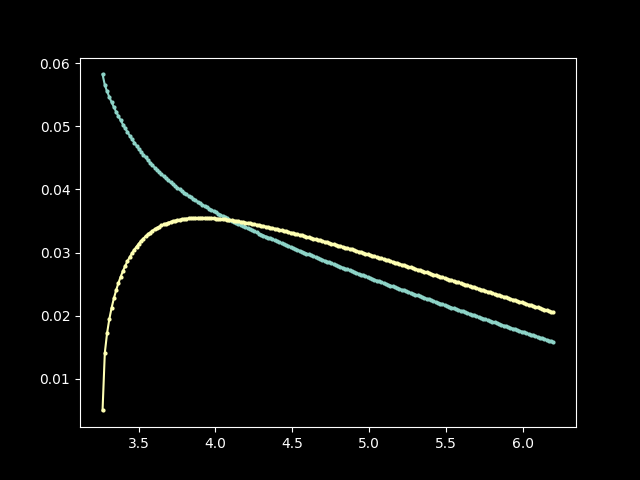

In [14]:
plt.close('all')
plt.plot(P1e.Zs, P1e.alphas.real, marker='o', markersize=2)
plt.plot(P1o.Zs, P1o.alphas.real, marker='o', markersize=2)

In [19]:
P2e = Propagator_Class(f0=f0, Lx=-.5, Rx=.5,
                       LZ=6.2, RZ=6.5, NZ=50,
                       field_type=field_type,
                       paper_method=False,
                       sign='+1')


 92% (46 of 50) |######################  | Elapsed Time: 0:00:00 ETA:   0:00:00

In [20]:
P2o = Propagator_Class(f0=f0, Lx=-.5, Rx=.5,
                       LZ=6.2, RZ=6.5, NZ=50,
                       field_type=field_type,
                       paper_method=False,
                       sign='-1')


 98% (49 of 50) |####################### | Elapsed Time: 0:00:00 ETA:   0:00:00

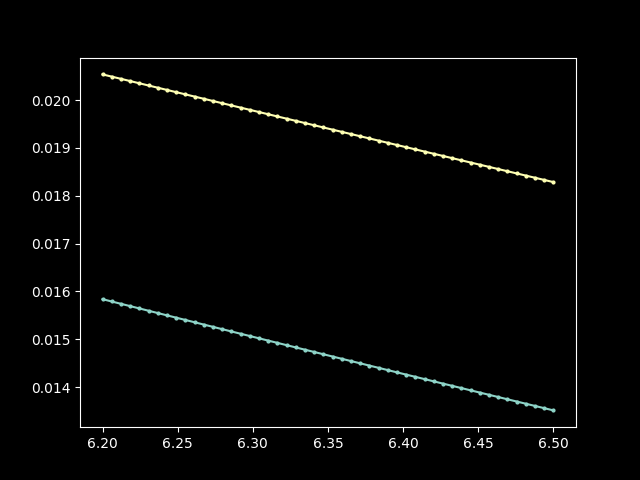

In [21]:
plt.close('all')
plt.plot(P2e.Zs, P2e.alphas.real, marker='o', markersize=2)
plt.plot(P2o.Zs, P2o.alphas.real, marker='o', markersize=2)

In [22]:
P3e = Propagator_Class(f0=f0, Lx=-.5, Rx=.5, 
                       LZ=6.5, RZ=8, NZ=100, 
                       field_type=field_type,
                       paper_method=False,
                       sign='+1')


 99% (99 of 100) |###################### | Elapsed Time: 0:00:01 ETA:   0:00:00

In [23]:
P3o = Propagator_Class(f0=f0, Lx=-.5, Rx=.5, 
                       LZ=6.5, RZ=8, NZ=100, 
                       field_type=field_type,
                       paper_method=False,
                       sign='-1')


 99% (99 of 100) |###################### | Elapsed Time: 0:00:01 ETA:   0:00:00

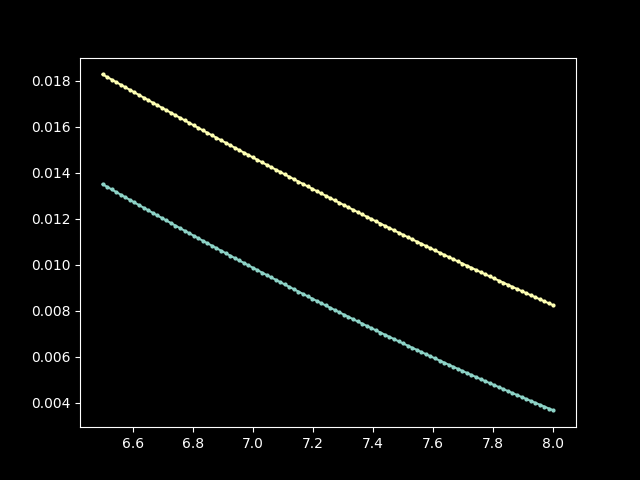

In [24]:
plt.close('all')
plt.plot(P3e.Zs, P3e.alphas.real, marker='o', markersize=2)
plt.plot(P3o.Zs, P3o.alphas.real, marker='o', markersize=2)

In [25]:
P4e = Propagator_Class(f0=f0, Lx=-.5, Rx=.5, 
                     LZ=8, RZ=25, NZ=200, 
                     field_type=field_type, 
                       paper_method=False,
                     sign='+1')


 97% (195 of 200) |##################### | Elapsed Time: 0:00:02 ETA:   0:00:00

In [26]:
P4o = Propagator_Class(f0=f0, Lx=-.5, Rx=.5, 
                     LZ=8, RZ=25, NZ=200, 
                     field_type=field_type, 
                       paper_method=False,
                     sign='-1')


 99% (198 of 200) |##################### | Elapsed Time: 0:00:02 ETA:   0:00:00

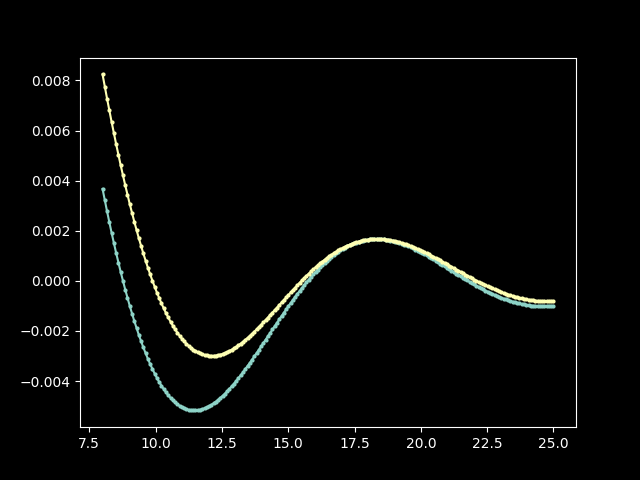

In [27]:
plt.close('all')
plt.plot(P4e.Zs, P4e.alphas.real, marker='o', markersize=2)
plt.plot(P4o.Zs, P4o.alphas.real, marker='o', markersize=2)

In [28]:
P5e = Propagator_Class(f0=f0, Lx=-.5, Rx=.5, 
                       LZ=25, RZ=45, NZ=200, 
                       field_type=field_type,
                       paper_method=False,
                       sign='+1')


 99% (198 of 200) |##################### | Elapsed Time: 0:00:04 ETA:   0:00:00

In [29]:
P5o = Propagator_Class(f0=f0, Lx=-.5, Rx=.5, 
                       LZ=25, RZ=45, NZ=200, 
                       field_type=field_type,
                       paper_method=False,
                       sign='-1')


 99% (198 of 200) |##################### | Elapsed Time: 0:00:03 ETA:   0:00:00

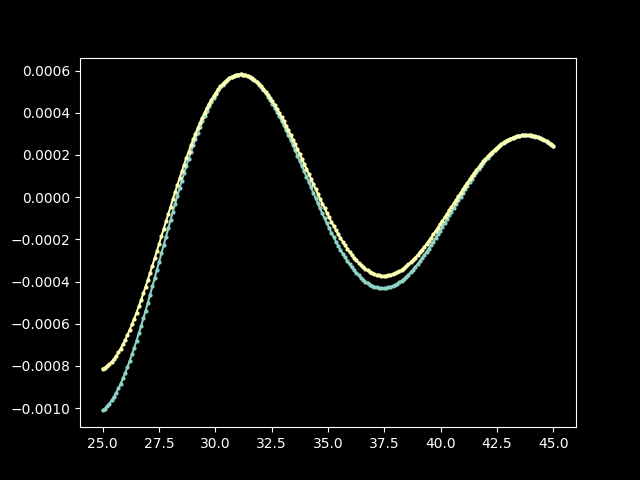

In [30]:
plt.close('all')
plt.plot(P5e.Zs, P5e.alphas.real, marker='o', markersize=2)
plt.plot(P5o.Zs, P5o.alphas.real, marker='o', markersize=2)

### Combine propagators into one function

In [31]:
Ps = [
    P0,
    P1e, P1o,
    P2e, P2o,
    P3e, P3o,
    P4e, P4o,
    P5e, P5o,
     ]
portion = 'full'

full = lambda x: sum([P.slice_propagate(x, portion=portion) for P in Ps])
Full = lambda x, z : sum([P.propagate(x, zs=z, portion=portion) for P in Ps])

diff = lambda x: full(x) - f0(x)

### Plot transform

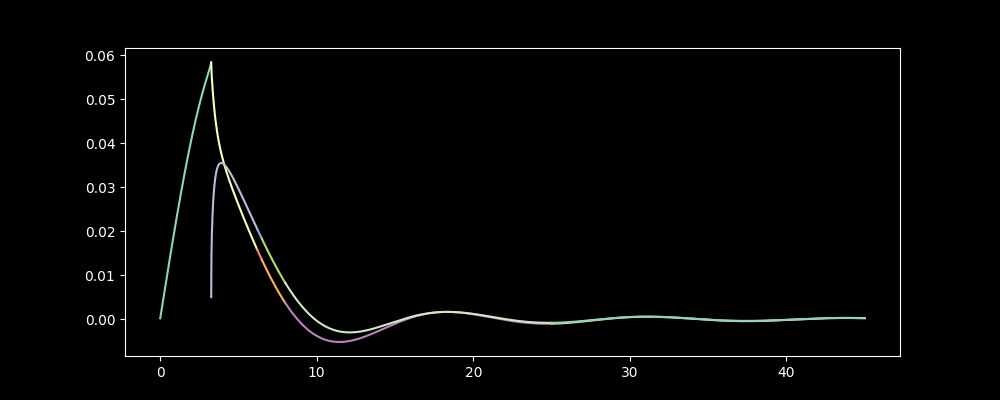

In [32]:
plt.close('all')
fig, ax = plt.subplots(1, figsize=(10,4))
for P in Ps:
    ax.plot(P.Zs, P.alphas.real, marker='o', markersize=0)
# plt.axis('equal')

# 1D Plot


In [40]:
xs = np.linspace(-3, 3, 1500)


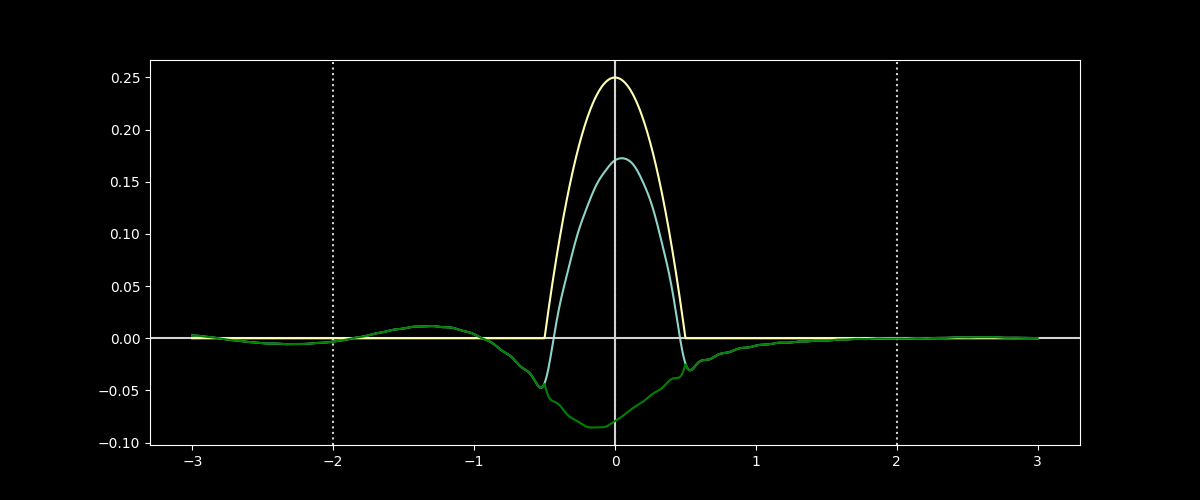

In [41]:
A.plot_field_1d(full, xs=xs, part='real');
A.add_1d_plot(plt.gca(), f0, xs=xs)
A.add_1d_plot(plt.gca(), diff, xs=xs, color='g')

## Slice along Z axis

In [30]:
portion = 'full'
slice_at = 0
constant_variable = 'x'

full_z = lambda x: sum([P.slice_propagate(x, portion=portion, slice_at=slice_at, constant_variable=constant_variable) for P in Ps])


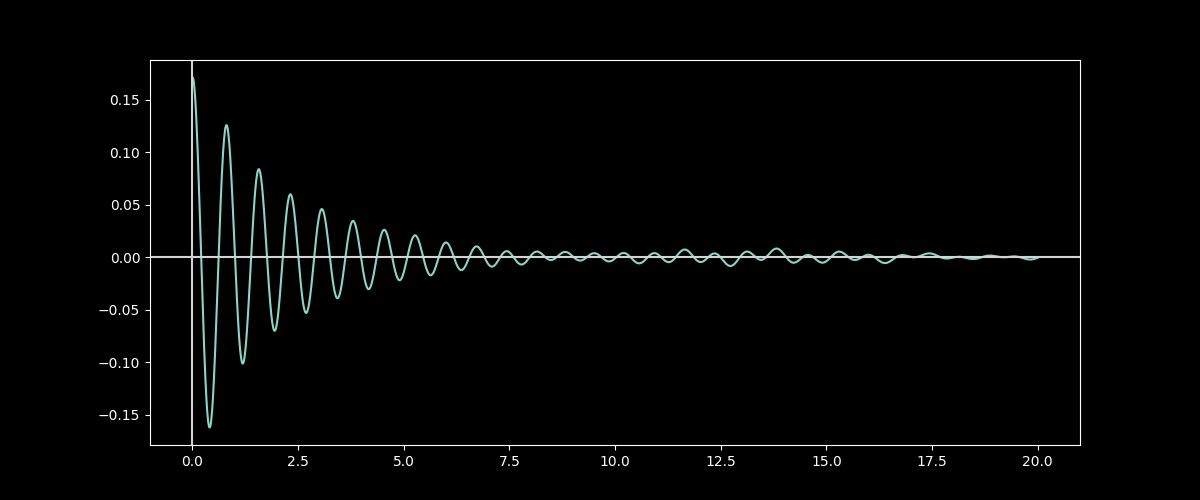

In [31]:
A.plot_field_1d(full_z, xs=np.linspace(0,20,2000), part='real', plot_Rhos=False);


## 2D Plots

In [32]:
xs = np.linspace(-15, 15, 1200)

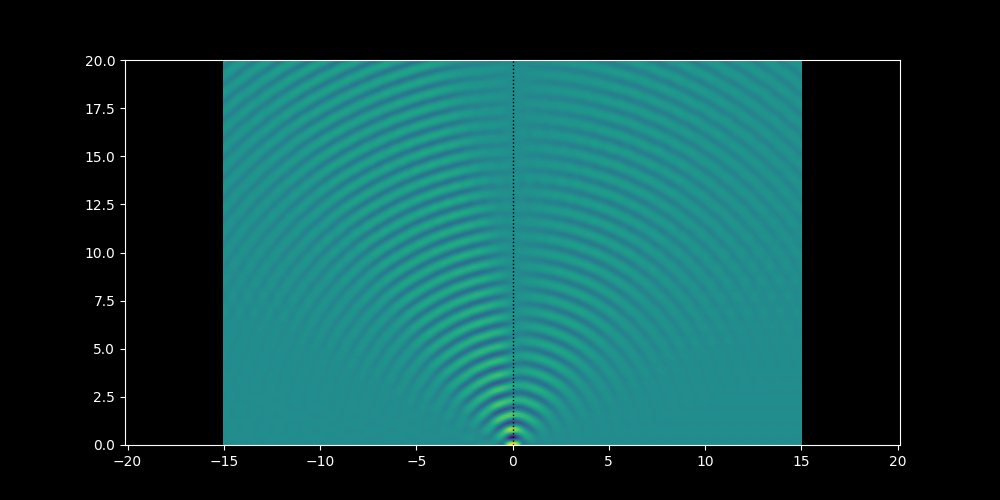

In [33]:
A.plot_field_2d(Full, xs=xs, zmin=0, zmax=20, zref=200, figsize=(10,5), colorbar=False)
plt.axis('equal');

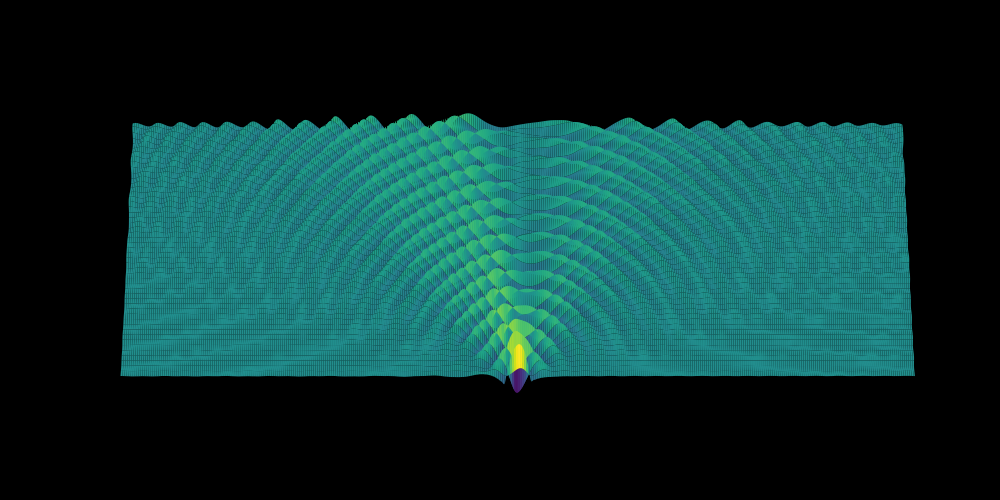

In [34]:
A.plot_field_2d(Full, surface=True, xs=xs, colorbar=False, zoom=2.5,
                azim=-90, elev=75, 
                zmax=10, zref=150,
                rstride=3, cstride=3)

## Save data for visualization

In [178]:
propfuncs = [P1, P2, P3]
evfuncs = [P4, P5, P6, P7, P8]

In [179]:
Prop = lambda x, z: sum([f.propagate(x, zs=z) for f in propfuncs])
Ev = lambda x, z: sum([f.propagate(x, zs=z) for f in evfuncs]) 
Full = lambda x, z: Prop(x, z) + Ev(x, z)

In [195]:
xs = np.linspace(-15, 15, 1200)
zs = np.linspace(0, 20, 600)


In [196]:
f0s = f0(xs)

In [197]:
rad_ys_propagating = Prop(xs, zs)

In [198]:
rad_ys_evanescent = Ev(xs, zs)


In [199]:
Xs, Zs = np.meshgrid(xs, zs)

In [200]:
def get_trig_indices(mesh_array):
    '''Get triangle index list for three js mesh formation via indexed buffer geometry.'''
    if len(mesh_array.shape) <= 1:
        raise ValueError('Provide meshgrid array as input.')
    Nz, Nx = mesh_array.shape[0], mesh_array.shape[1]
    l_inds = Nx * Nz
    indices =  np.arange(0, l_inds).reshape((Nx, Nz)).T  # Note transpose
    fbases = indices[:Nz-1, :Nx-1].T.flatten()  # Note transpose and index switch due to transpose
    f1 = np.array([[i, i+Nz, i+1] for i in fbases], dtype=int)
    f2 = np.array([[i+1, i+Nz, i+Nz+1] for i in fbases], dtype=int)
    return np.concatenate((f1, f2))


def get_base_vertices(Xs, Zs):
    '''Get vertices of triangles with zero height (y component in three.js).'''
    if Xs.shape != Zs.shape:
        raise ValueError('Provide meshgrid arrays (ie Xs, Zs = np.meshgrid(xs,zs)) as inputs.')
    Base = np.array([Xs, np.zeros_like(Xs), Zs], dtype=float)
    L = Xs.shape[0] * Xs.shape[1]
    base_vertices = Base.T.reshape((L,3))
    return base_vertices


def create_height_array_from_complex(ys, Xs):
    '''Get data for height from complex ys input (needs to be formatted as list:
        [ys[0].real, ys[0].imag, ys[1].real, ys[1].imag, ... ].'''
    L = Xs.shape[0] * Xs.shape[1]
    Ys = np.array([ys.real, ys.imag], dtype=float)
    heights = Ys.T.reshape((L,2))
    return heights


def save_trig_indices_as_json(filepath, mesh_array):
    indices = get_trig_indices(mesh_array)
    with open(filepath + '.json', 'w') as outfile:
        json.dump(indices.flatten().tolist(), outfile, separators=(',', ':'),
                  sort_keys=True, indent=4)


def save_base_vertices_as_json(filepath, Xs, Zs):
    base_vertices = get_base_vertices(Xs, Zs)
    with open(filepath + '.json', 'w') as outfile:
        json.dump(base_vertices.flatten().tolist(), outfile, separators=(',', ':'),
                  sort_keys=True, indent=4)
        

def save_heights_as_json(filepath, ys, Xs):
    heights= create_height_array_from_complex(ys, Xs)
    with open(filepath + '.json', 'w') as outfile:
        json.dump(heights.flatten().tolist(), outfile, separators=(',', ':'),
                  sort_keys=True, indent=4)

def save_values_as_json(filepath, f0s):
    with open(filepath + '.json', 'w') as outfile:
        json.dump(f0s.tolist(), outfile, separators=(',', ':'),
                  sort_keys=True, indent=4)




In [201]:
prefix='/home/pv/local/slab/apps/antiguide/'

In [202]:
save_trig_indices_as_json(prefix + 'trig_indices_new', Xs)


In [203]:
save_base_vertices_as_json(prefix + 'base_vertices_new', Xs, Zs)


In [204]:
save_heights_as_json(prefix + 'evanescent_heights', rad_ys_evanescent, Xs)


In [205]:
save_heights_as_json(prefix + 'propagating_heights', rad_ys_propagating, Xs)


In [206]:
save_values_as_json(prefix + 'f0s', f0s)


In [207]:
save_values_as_json(prefix + 'x0s', xs)


### Animation of input field

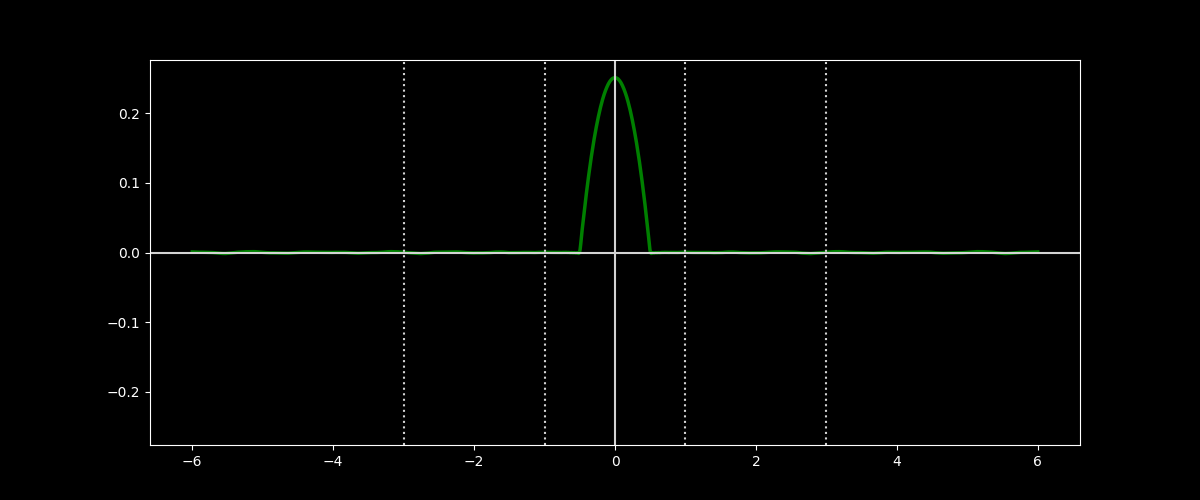

In [134]:
A.animate_field_1d(full, 'slice', xs=xs, linewidth=2.5, color='green')

In [135]:
from IPython.display import HTML


HTML("""
<video alt="test" controls id="theVideo">
        <source src="slice.mp4" type="video/mp4">
</video>

<script>
video = document.getElementById("theVideo")
video.playbackRate = 1;
</script>
""")